In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000 

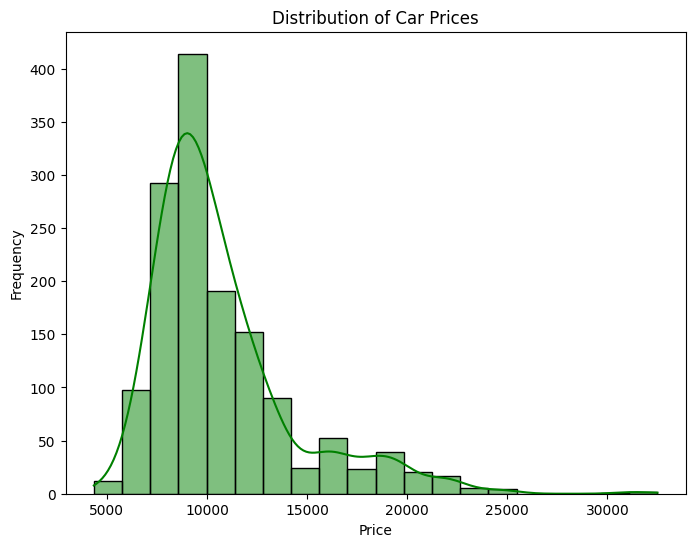

In [28]:
#distributing prices of cars
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=20, kde=True, color='green')
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

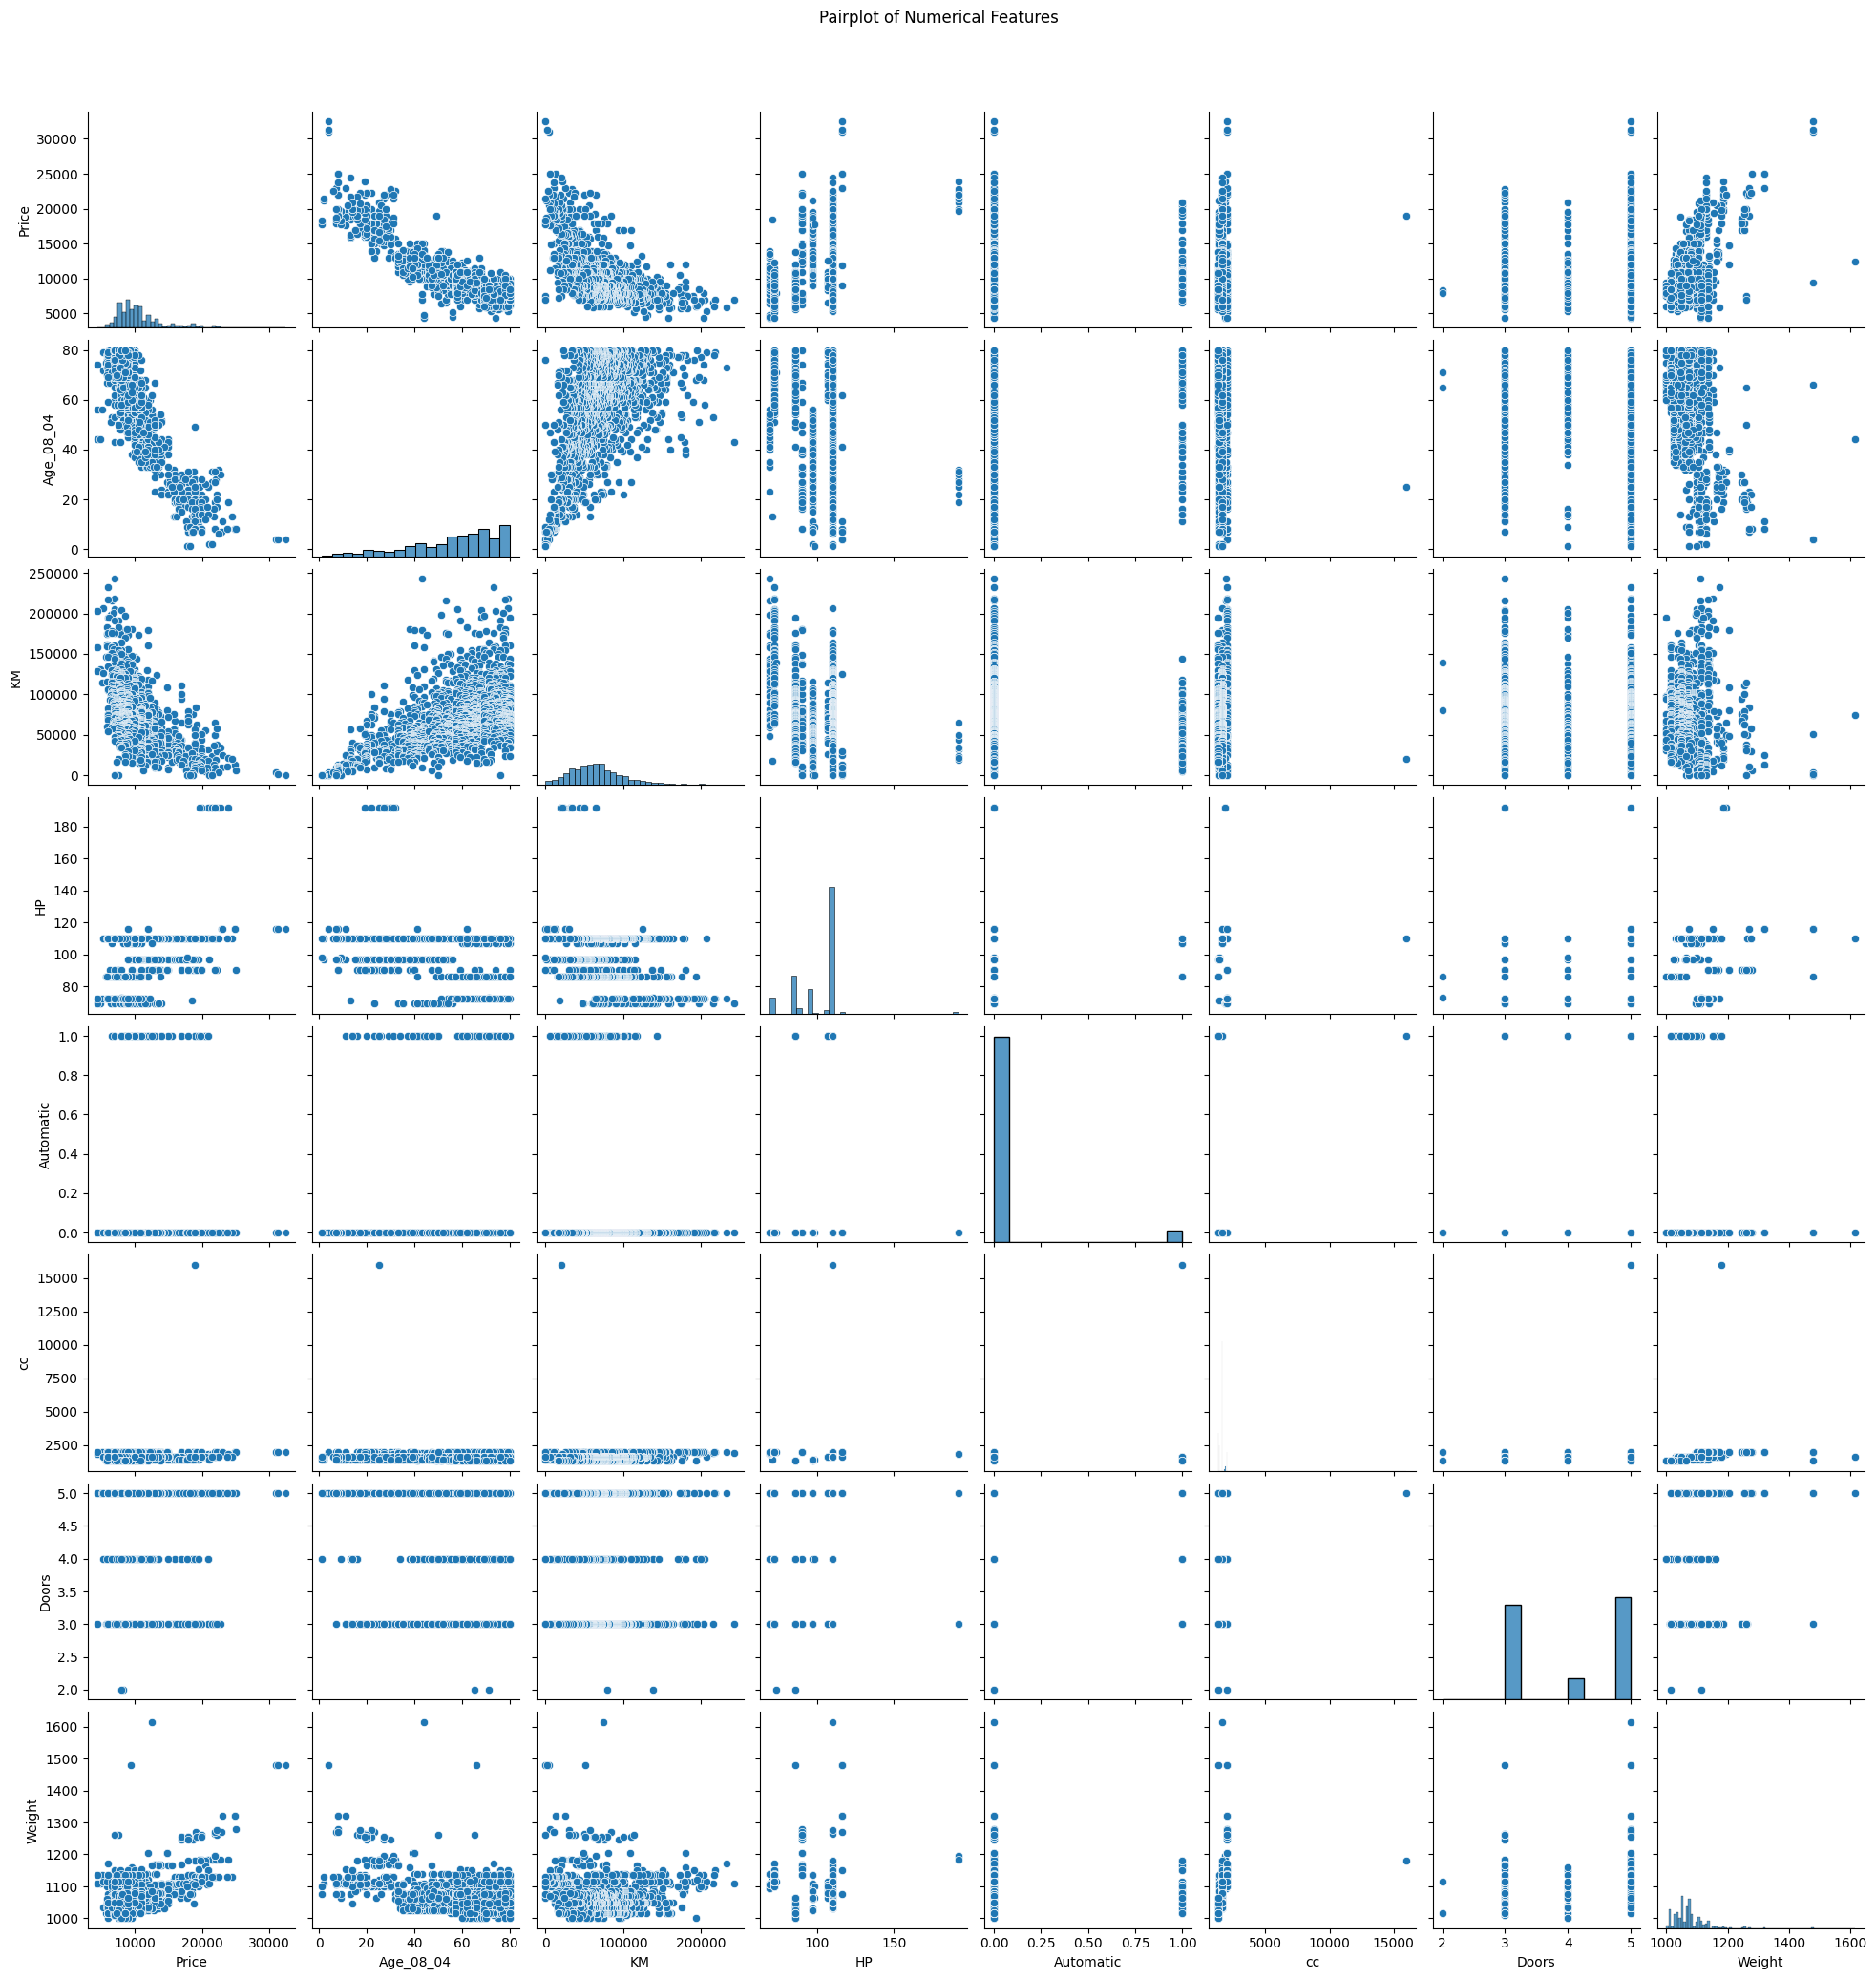

In [29]:
#for numeric data
sns.pairplot(df.select_dtypes(include='number'))
plt.suptitle("Pairplot of Numerical Features", y=1.04)
plt.show()

In [8]:
#heatmap
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

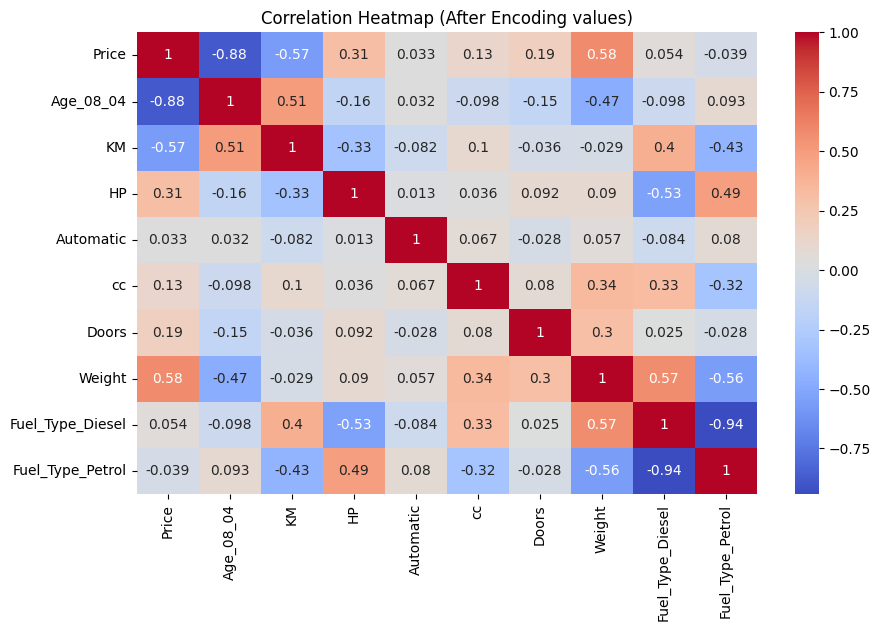

In [30]:
#plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (After Encoding values)")
plt.show()

In [31]:
#splitting dataset
X = df.drop(columns='Price')  # Independent variables
y = df['Price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()
X_train[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']] = scaler.fit_transform(X_train[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']])
X_test[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']] = scaler.transform(X_test[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']])

In [34]:
#building model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [35]:
#predictions of model
y_pred = model.predict(X_test)

In [20]:
#evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2224306.0403935467
Root Mean Squared Error: 1491.4107550884655
R-squared: 0.8332952678447362


In [21]:
#coefficient interpretation
print("\nModel Coefficients:")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")


Model Coefficients:
Age_08_04: -2267.156302573448
KM: -600.1799905581768
HP: 234.13833240601494
Automatic: 93.08199343840509
cc: -14.09831080440692
Doors: -80.50083638641424
Weight: 1326.1903518308204
Fuel_Type_Diesel: 4.202109588002929
Fuel_Type_Petrol: 1453.6944613310613


In [22]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [23]:
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_pred)
print("\nRidge Regression Evaluation:")
print(f"Mean Squared Error: {ridge_mse}")
print(f"Root Mean Squared Error: {ridge_rmse}")
print(f"R-squared: {ridge_r2}")


Ridge Regression Evaluation:
Mean Squared Error: 2219203.0345914853
Root Mean Squared Error: 1489.6989744882976
R-squared: 0.8336777220574078


In [24]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.1)

In [25]:
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_pred)
print("\nLasso Regression Evaluation:")
print(f"Mean Squared Error: {lasso_mse}")
print(f"Root Mean Squared Error: {lasso_rmse}")
print(f"R-squared: {lasso_r2}")


Lasso Regression Evaluation:
Mean Squared Error: 2223975.4905794444
Root Mean Squared Error: 1491.2999331386843
R-squared: 0.8333200415122186


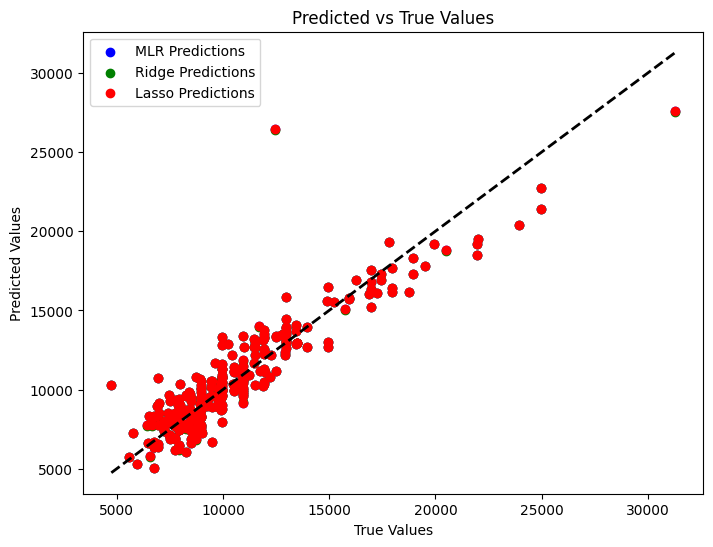

In [26]:
#visualisations
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='MLR Predictions')
plt.scatter(y_test, ridge_pred, color='green', label='Ridge Predictions')
plt.scatter(y_test, lasso_pred, color='red', label='Lasso Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs True Values")
plt.legend()
plt.show()

In [ ]:
#What is Normalization & Standardization and how is it helpful?
Normalization is the process of scaling data between 0 and 1 (or -1 and 1). It is also called Min-Max scaling.

In [ ]:
#What techniques can be used to address multicollinearity in multiple linear regression?
1.regularisation technique
2.pca
3.combining correlation variables.
